In [1]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import seaborn as sn
from pprint import pprint
import numpy as np

from sklearn.datasets import fetch_20newsgroups
# use annual index instead?
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import re

## Chargement du dataset 20 newsgroups
Pour plus d'information : https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

In [2]:
news = fetch_20newsgroups(subset='all')

In [3]:
print("Number of articles: " + str(len(news.data)))

Number of articles: 18846


In [4]:
print("Number of categories: " + str(len(news.target_names)))

Number of categories: 20


## Exploration du dataset

In [5]:
labels = news.target_names
pprint(labels)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [6]:
# Exemples d'articles et de labels
for i, article in enumerate(news.data[:10]):
    print(f'===== {labels[news.target[i]]} =====')
    print(article.replace('\n', ' '), '\n')

===== rec.sport.hockey =====
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu> Subject: Pens fans reactions Organization: Post Office, Carnegie Mellon, Pittsburgh, PA Lines: 12 NNTP-Posting-Host: po4.andrew.cmu.edu    I am sure some bashers of Pens fans are pretty confused about the lack of any kind of posts about the recent Pens massacre of the Devils. Actually, I am  bit puzzled too and a bit relieved. However, I am going to put an end to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they are killing those Devils worse than I thought. Jagr just showed you why he is much better than his regular season stats. He is also a lot fo fun to watch in the playoffs. Bowman should let JAgr have a lot of fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final regular season game.          PENS RULE!!!   

===== comp.sys.ibm.pc.hardware =====
From: mblawson@midway.ecn.uok

## Création d'un modèle de machine learning avec Scikit-Learn

Pour plus d'information :

Pipeline : https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
TfidfVectorizer : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
MultinomialNB : https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
Un article de blog qui expliquer le TFIDF:

https://medium.com/analytics-vidhya/tf-idf-term-frequency-technique-easiest-explanation-for-text-classification-in-nlp-with-code-8ca3912e58c3
Un article de blog qui explique les naive bayes:

https://towardsdatascience.com/naive-bayes-classifier-explained-54593abe6e18

In [7]:
classifier = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'), min_df=50, max_df=0.5)),
    ('classifier', MultinomialNB()),
    ])

In [19]:
classifier.named_steps

{'vectorizer': TfidfVectorizer(max_df=0.5, min_df=50,
                 stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                             'ourselves', 'you', "you're", "you've", "you'll",
                             "you'd", 'your', 'yours', 'yourself', 'yourselves',
                             'he', 'him', 'his', 'himself', 'she', "she's",
                             'her', 'hers', 'herself', 'it', "it's", 'its',
                             'itself', ...]),
 'classifier': MultinomialNB()}

## Séparation du dataset en features et target (X, y) et en train et test
Plus d'information : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [8]:
labelled_target = np.array([labels[t] for t in news.target])

In [11]:
labelled_target

array(['rec.sport.hockey', 'comp.sys.ibm.pc.hardware',
       'talk.politics.mideast', ..., 'comp.sys.ibm.pc.hardware',
       'comp.graphics', 'rec.autos'], dtype='<U24')

In [9]:
texts = [re.sub('[^a-z]+', ' ', t.lower()).strip() for t in news.data]

In [12]:
texts[0]

'from mamatha devineni ratnam mr andrew cmu edu subject pens fans reactions organization post office carnegie mellon pittsburgh pa lines nntp posting host po andrew cmu edu i am sure some bashers of pens fans are pretty confused about the lack of any kind of posts about the recent pens massacre of the devils actually i am bit puzzled too and a bit relieved however i am going to put an end to non pittsburghers relief with a bit of praise for the pens man they are killing those devils worse than i thought jagr just showed you why he is much better than his regular season stats he is also a lot fo fun to watch in the playoffs bowman should let jagr have a lot of fun in the next couple of games since the pens are going to beat the pulp out of jersey anyway i was very disappointed not to see the islanders lose the final regular season game pens rule'

In [13]:
X_train, X_test, y_train, y_test = train_test_split(texts, labelled_target, test_size=0.2, random_state=11)

In [15]:
len(X_train)

15076

## Entraînement du modèle de machine learning sur les données d'entrainement

In [16]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.5, min_df=50,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', MultinomialNB())])

## Qu'est ce qu'il s'est passé ?


In [20]:
# Le TFIDF a calculé l'IDF de chaque mot du corpus
feature_names = classifier.named_steps['vectorizer'].get_feature_names()
idf_ = classifier.named_steps['vectorizer'].idf_

In [21]:
len(feature_names)

5143

In [ ]:
# C'était donc une liste de 5143 dimensions. Si on doit les représenter dans un espace vertocirel, on serait dans un espace à 5143 dimensions. 

In [22]:
for i in range(1000, 1042):
    print(feature_names[i], ':', round(idf_[i], 2))

controlled : 5.82
controller : 5.14
controls : 6.0
convenient : 6.58
conventional : 6.37
conversation : 5.99
conversations : 6.43
conversion : 6.02
convert : 5.33
converted : 6.14
converter : 6.3
converting : 6.42
convex : 6.12
conviction : 6.65
convince : 5.69
convinced : 5.78
convincing : 6.6
cook : 6.24
cookamunga : 6.65
cool : 5.42
cooperation : 6.36
cop : 6.36
copies : 5.55
cops : 5.88
copy : 4.39
copying : 6.69
copyright : 6.06
core : 5.71
cornell : 5.68
corner : 5.82
corp : 4.59
corporate : 6.1
corporation : 4.33
correct : 4.26
corrected : 6.65
correction : 6.32
corrections : 6.65
correctly : 5.39
corresponding : 6.48
cost : 4.25
costs : 5.11
could : 2.58


In [23]:
# Et ensuite il transforme chaque document en vecteur de la taille du vocabulaire et donc le score est le TFIDF
tmp = classifier.named_steps['vectorizer'].transform(X_train[:10])
pd.DataFrame(tmp.toarray(), columns=classifier.named_steps['vectorizer'].get_feature_names())

,aa,aaron,ab,abc,abiding,ability,able,abortion,absence,absolute,...,za,zealand,zero,zeus,zip,zone,zoo,zoology,zuma,zx
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.174288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# C'est le résultat du corpus. Le code ne sert à rien dans le cadre de cet exercice, juste de voir ce que cela donne.

In [25]:
# Et le naïf bayésien apprends la corrélation entre chaque mot et chaque catégorie
pd.DataFrame(classifier.named_steps['classifier'].coef_, index=labels, columns=feature_names).T

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
aa,-9.031391,-8.958973,-8.527638,-8.319295,-8.925907,-8.017776,-8.338903,-8.847072,-8.689504,-8.534174,-9.071793,-8.714859,-8.470774,-8.614734,-8.706762,-8.461593,-8.998162,-7.815180,-8.107581,-8.958584
aaron,-8.378431,-8.849708,-9.033866,-9.196784,-8.492120,-9.190999,-8.790613,-8.659238,-9.049479,-8.145555,-9.208785,-9.318824,-8.040582,-9.211536,-9.050755,-7.785653,-7.866473,-9.143891,-8.971644,-9.090971
ab,-9.185357,-7.972288,-8.562905,-7.673833,-8.754312,-8.487363,-8.810958,-8.286023,-8.911522,-7.594498,-7.920195,-8.808036,-8.300560,-8.414757,-8.787571,-9.092512,-7.801775,-7.346560,-8.718668,-8.978612
abc,-9.131438,-8.753549,-9.194310,-9.196784,-9.181220,-9.174574,-9.074543,-9.254986,-9.259142,-9.231355,-7.017145,-9.291640,-9.122571,-9.271538,-8.933545,-9.314238,-8.652985,-9.206410,-9.068503,-9.090971
abiding,-9.185357,-9.199717,-9.194310,-9.196784,-9.181220,-9.190999,-9.169064,-8.548527,-9.259142,-9.231355,-9.267207,-8.420616,-9.217825,-9.271538,-9.267220,-9.241010,-8.115616,-9.281593,-9.067636,-8.987767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zone,-9.185357,-9.199717,-9.109107,-9.094641,-8.439665,-9.182853,-8.543065,-9.029871,-8.807916,-7.822042,-8.089170,-8.842459,-8.611304,-9.136541,-8.917161,-9.314238,-9.199511,-8.261390,-9.171456,-8.929195
zoo,-9.103881,-9.177028,-9.190190,-9.196784,-9.181220,-9.190999,-9.169064,-9.254986,-9.151984,-8.938677,-9.205760,-9.318824,-8.059584,-9.171290,-6.475637,-9.314238,-9.281239,-9.241611,-9.192008,-9.090971
zoology,-9.185357,-9.199717,-9.194310,-9.196784,-9.181220,-9.190999,-9.169064,-9.254986,-9.259142,-9.043692,-9.267207,-9.318824,-8.246820,-9.271538,-6.822597,-9.314238,-9.281239,-9.306873,-9.192008,-9.090971
zuma,-9.185357,-9.199717,-9.194310,-9.196784,-9.181220,-9.050666,-9.169064,-9.254986,-9.259142,-9.231355,-9.267207,-9.318824,-9.217825,-9.271538,-9.267220,-9.314238,-9.281239,-6.860618,-9.192008,-9.090971


In [ ]:
## coef_ c'est la probabilité d'appartenance à une classe étant donné un mot.

In [26]:
pd.DataFrame(classifier.named_steps['classifier'].coef_, index=labels, columns=feature_names).T.sort_values(by='alt.atheism', ascending=False).head(20)

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
god,-5.629670,-8.704846,-9.094973,-8.990857,-8.870367,-8.861816,-8.675248,-8.789653,-8.195833,-8.492925,-8.493487,-8.917387,-8.838696,-8.019039,-8.664412,-5.000980,-8.093168,-8.170317,-8.130354,-5.735703
keith,-5.882089,-8.737892,-8.586443,-8.496092,-8.726020,-8.508928,-8.391996,-8.373301,-8.233647,-7.985871,-7.560855,-9.284671,-8.858562,-8.420851,-8.253777,-9.314238,-8.389307,-9.306873,-8.948380,-7.917330
atheists,-5.974069,-9.199717,-9.194310,-9.196784,-9.181220,-9.190999,-9.169064,-9.254986,-9.259142,-9.231355,-9.267207,-9.318824,-9.217825,-9.098573,-9.267220,-7.181910,-9.281239,-9.255643,-9.192008,-8.598078
com,-6.065623,-6.260776,-6.058572,-5.796103,-6.465125,-5.805995,-6.168205,-5.540777,-5.341518,-5.984094,-6.718282,-5.497733,-6.075079,-5.838291,-6.219172,-6.394847,-5.632970,-6.549447,-5.768002,-5.942730
atheism,-6.123527,-9.199717,-9.112648,-9.196784,-9.181220,-9.190999,-9.169064,-9.254986,-9.259142,-9.231355,-9.267207,-9.318824,-9.217825,-9.169744,-9.267220,-7.915793,-9.281239,-9.192493,-9.108366,-8.433292
livesey,-6.138685,-9.199717,-9.194310,-9.196784,-9.181220,-9.190999,-9.169064,-9.254986,-9.259142,-9.231355,-9.267207,-9.318824,-9.217825,-9.271538,-9.267220,-9.314238,-9.281239,-9.306873,-9.192008,-7.895678
sgi,-6.190705,-7.405840,-9.194310,-7.904905,-9.081756,-7.753614,-9.169064,-8.981544,-8.585501,-7.376878,-8.136693,-8.759633,-9.128947,-9.252298,-9.196350,-8.883473,-9.281239,-9.248137,-8.691874,-7.764285
one,-6.272603,-6.782947,-6.663092,-6.514378,-6.571317,-6.968653,-6.674728,-6.501169,-6.512108,-6.493790,-6.641515,-6.438578,-6.292106,-6.305665,-6.579500,-6.052786,-6.561392,-6.549465,-6.629893,-6.517546
people,-6.288699,-7.837525,-7.487701,-7.799657,-7.617131,-7.845820,-7.981606,-7.068052,-7.314963,-7.243437,-7.294049,-6.494672,-7.421955,-6.678731,-7.070425,-6.156016,-6.057548,-6.152312,-6.029704,-6.433209
caltech,-6.319581,-8.362273,-8.822622,-9.115643,-8.677234,-8.796101,-8.868876,-8.041291,-8.867189,-8.081971,-9.267207,-8.234812,-7.784758,-7.775708,-7.357496,-9.074977,-7.685751,-9.306873,-8.386358,-8.244432


In [ ]:
## Devant un nouveau texte, il va regarder la probabilité de chacune des classes en fonction du vecteur que l'on aura pour chaque mot.

## Prédiction des targets des données de test


In [27]:
len(X_test)

3770

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
# Aperçu des targets prédites
y_pred

array(['sci.crypt', 'misc.forsale', 'rec.sport.baseball', ...,
       'rec.sport.baseball', 'comp.windows.x', 'misc.forsale'],
      dtype='<U24')

In [30]:
# Aperçu des targets réelles
y_test

array(['sci.crypt', 'comp.os.ms-windows.misc', 'sci.med', ...,
       'rec.sport.baseball', 'comp.graphics', 'misc.forsale'],
      dtype='<U24')

## Construction du rapport de classification
Pour plus d'information sur la précision, le recall et le f1-score : https://fr.wikipedia.org/wiki/Pr%C3%A9cision_et_rappel

In [31]:
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.90      0.80      0.84       172
           comp.graphics       0.72      0.77      0.75       184
 comp.os.ms-windows.misc       0.81      0.79      0.80       204
comp.sys.ibm.pc.hardware       0.71      0.76      0.74       195
   comp.sys.mac.hardware       0.87      0.82      0.84       195
          comp.windows.x       0.84      0.87      0.86       204
            misc.forsale       0.77      0.79      0.78       164
               rec.autos       0.84      0.94      0.89       180
         rec.motorcycles       0.88      0.94      0.91       173
      rec.sport.baseball       0.94      0.90      0.92       217
        rec.sport.hockey       0.86      0.98      0.91       178
               sci.crypt       0.93      0.95      0.94       197
         sci.electronics       0.83      0.78      0.81       199
                 sci.med       0.92      0.92      0.92       183
         

In [ ]:
# Rapport qui sont les mesures typiques d'évaluation d'un modèle

## Création d'une matrice de confusion


In [33]:
from scikitplot.metrics import plot_confusion_matrix

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

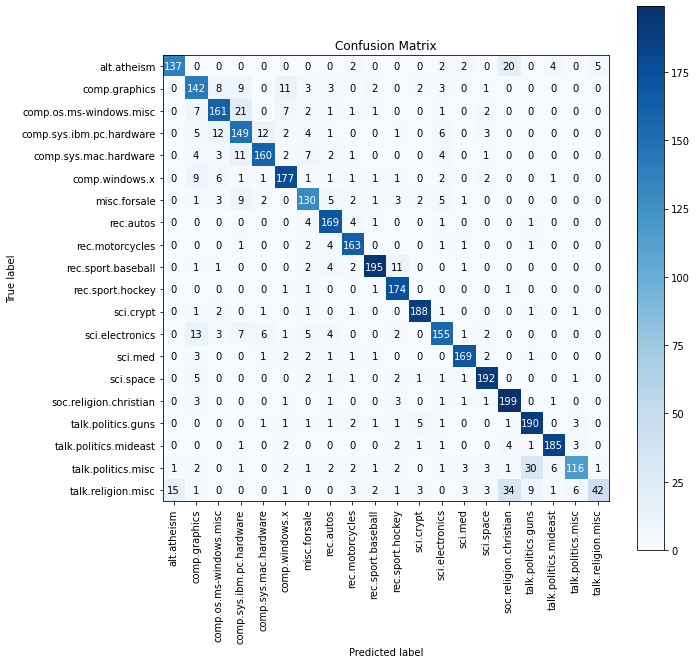

In [34]:
plot_confusion_matrix(y_test, y_pred, figsize=(10, 10), labels=labels, x_tick_rotation=90)

In [ ]:
# On retrouve, ici, les catégories réelles et les catégories prédites. 

# On peut voir où le modèle se trompe et on peut facilement l'expliquer. On comprend pourquoi le modèle confond christianisme et athéisme. 

# C'est donc une manière d'analyser la qualité d'un modèle, d'évaluer sa performance en observant sa matrice de confusion (y a-t-il un pattern de confusion qui apparaît?)